# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [60]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import random
import datetime
from scipy.stats import linregress


# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [61]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

625

In [62]:
cities

['victoria',
 'reshetylivka',
 'margate',
 'cape town',
 'rikitea',
 'tezu',
 'kailua',
 'kangaatsiaq',
 'bulgan',
 'morozovsk',
 'hithadhoo',
 'khatanga',
 'likasi',
 'saint-georges',
 'geraldton',
 'provideniya',
 'khandyga',
 'arlit',
 'kahului',
 'albany',
 'belaya gora',
 'azimur',
 'hervey bay',
 'vaitupu',
 'kracheh',
 'lircay',
 'bluff',
 'ushuaia',
 'kapaa',
 'tasiilaq',
 'kandrian',
 'sola',
 'nikolskoye',
 'topeka',
 'naushki',
 'mataura',
 'gat',
 'roma',
 'tiksi',
 'chapais',
 'los llanos de aridane',
 'burnie',
 'ostrovnoy',
 'hasaki',
 'skjervoy',
 'hermanus',
 'ciudad del maiz',
 'mahebourg',
 'amderma',
 'yerbogachen',
 'the pas',
 'taolanaro',
 'gonbad-e qabus',
 'aflu',
 'khonuu',
 'kavieng',
 'arraial do cabo',
 'mar del plata',
 'punta arenas',
 'auki',
 'fallon',
 'luanda',
 'codrington',
 'qaanaaq',
 'verkhnyaya inta',
 'touros',
 'rio grande',
 'san vicente',
 'vaini',
 'hobart',
 'bathsheba',
 'jamestown',
 'klyuchevskiy',
 'vardo',
 'srivardhan',
 'cherskiy',


### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [65]:
# Starting URL for Weather Map API Call
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key 

In [66]:
city_weath = requests.get(city_url).json()
city_weath

{'coord': {'lon': 166.46, 'lat': -22.28},
 'weather': [{'id': 500,
   'main': 'Rain',
   'description': 'light rain',
   'icon': '10n'}],
 'base': 'stations',
 'main': {'temp': 80.6,
  'feels_like': 80.58,
  'temp_min': 80.6,
  'temp_max': 80.6,
  'pressure': 995,
  'humidity': 83},
 'visibility': 10000,
 'wind': {'speed': 18.34, 'deg': 290},
 'rain': {'3h': 0.81},
 'clouds': {'all': 99},
 'dt': 1584297687,
 'sys': {'type': 1,
  'id': 7344,
  'country': 'NC',
  'sunrise': 1584298586,
  'sunset': 1584342559},
 'timezone': 39600,
 'id': 2139521,
 'name': 'Noumea',
 'cod': 200}

In [67]:
city_loc = []
city_counter = 1
city_set = 1

#loop through city list(count=creating set)
for count,ele in enumerate(cities): 
    print (count,ele)
    #grouping the cities in sets of 50.
    if (count % 50 == 0 and count >= 50):
        city_set += 1
        city_counter = 0

        
    #adding to the end of the url(ele=city names)
    city_url = url + "&q=" + ele
    print("Processing Record %s of Set %s | %s" % (city_counter, city_set, ele))
    
    #increase city counter
    city_counter += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weath = requests.get(city_url).json()
        
        #country, lon, lat, temp, humidity, cloud factor, wind, date
        country= city_weath["sys"]["country"]
        date= city_weath["dt"]
        lon= city_weath["coord"]["lon"]
        lat= city_weath["coord"]["lat"]
        temp = city_weath["main"]["temp_max"]
        humidity = city_weath["main"]["humidity"]
        cloud_factor = city_weath["clouds"]["all"]
        wind = city_weath["wind"]["speed"]
        
        #append info above into a dict.
        
        city_loc.append({"City":ele,
                        "Country":country,
                        "Date":date,
                        "Longitude":lon,
                        "Latitude":lat,
                        "Max Temperature":temp,
                        "Humidity": humidity,
                        "Cloudiness": cloud_factor,
                        "Wind speed": wind})
        # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
        
    



0 victoria
Processing Record 1 of Set 1 | victoria
1 reshetylivka
Processing Record 2 of Set 1 | reshetylivka
2 margate
Processing Record 3 of Set 1 | margate
3 cape town
Processing Record 4 of Set 1 | cape town
4 rikitea
Processing Record 5 of Set 1 | rikitea
5 tezu
Processing Record 6 of Set 1 | tezu
6 kailua
Processing Record 7 of Set 1 | kailua
7 kangaatsiaq
Processing Record 8 of Set 1 | kangaatsiaq
8 bulgan
Processing Record 9 of Set 1 | bulgan
9 morozovsk
Processing Record 10 of Set 1 | morozovsk
10 hithadhoo
Processing Record 11 of Set 1 | hithadhoo
11 khatanga
Processing Record 12 of Set 1 | khatanga
12 likasi
Processing Record 13 of Set 1 | likasi
13 saint-georges
Processing Record 14 of Set 1 | saint-georges
14 geraldton
Processing Record 15 of Set 1 | geraldton
15 provideniya
Processing Record 16 of Set 1 | provideniya
16 khandyga
Processing Record 17 of Set 1 | khandyga
17 arlit
Processing Record 18 of Set 1 | arlit
18 kahului
Processing Record 19 of Set 1 | kahului
19 alb

145 leh
Processing Record 45 of Set 3 | leh
146 georgetown
Processing Record 46 of Set 3 | georgetown
147 vestmannaeyjar
Processing Record 47 of Set 3 | vestmannaeyjar
148 teahupoo
Processing Record 48 of Set 3 | teahupoo
149 junction city
Processing Record 49 of Set 3 | junction city
150 carnarvon
Processing Record 0 of Set 4 | carnarvon
151 barrow
Processing Record 1 of Set 4 | barrow
152 lasa
Processing Record 2 of Set 4 | lasa
153 illoqqortoormiut
Processing Record 3 of Set 4 | illoqqortoormiut
City not found. Skipping...
154 aripuana
Processing Record 4 of Set 4 | aripuana
155 matera
Processing Record 5 of Set 4 | matera
156 muli
Processing Record 6 of Set 4 | muli
157 tilichiki
Processing Record 7 of Set 4 | tilichiki
158 torbay
Processing Record 8 of Set 4 | torbay
159 whitehorse
Processing Record 9 of Set 4 | whitehorse
160 lebu
Processing Record 10 of Set 4 | lebu
161 anadyr
Processing Record 11 of Set 4 | anadyr
162 baykalsk
Processing Record 12 of Set 4 | baykalsk
163 vao
Pr

287 olinda
Processing Record 37 of Set 6 | olinda
288 port macquarie
Processing Record 38 of Set 6 | port macquarie
289 isabela
Processing Record 39 of Set 6 | isabela
290 shrewsbury
Processing Record 40 of Set 6 | shrewsbury
291 ahome
Processing Record 41 of Set 6 | ahome
292 mahon
Processing Record 42 of Set 6 | mahon
293 kristiansund
Processing Record 43 of Set 6 | kristiansund
294 ilulissat
Processing Record 44 of Set 6 | ilulissat
295 novopskov
Processing Record 45 of Set 6 | novopskov
296 ust-kamchatsk
Processing Record 46 of Set 6 | ust-kamchatsk
City not found. Skipping...
297 sibu
Processing Record 47 of Set 6 | sibu
298 volkhov
Processing Record 48 of Set 6 | volkhov
299 la libertad
Processing Record 49 of Set 6 | la libertad
300 mys shmidta
Processing Record 0 of Set 7 | mys shmidta
City not found. Skipping...
301 guaruja
Processing Record 1 of Set 7 | guaruja
302 aranos
Processing Record 2 of Set 7 | aranos
303 houma
Processing Record 3 of Set 7 | houma
304 padang
Processin

435 yeletskiy
Processing Record 35 of Set 9 | yeletskiy
City not found. Skipping...
436 tocopilla
Processing Record 36 of Set 9 | tocopilla
437 ponta do sol
Processing Record 37 of Set 9 | ponta do sol
438 hurghada
Processing Record 38 of Set 9 | hurghada
439 octeville
Processing Record 39 of Set 9 | octeville
440 galgani
Processing Record 40 of Set 9 | galgani
City not found. Skipping...
441 bentiu
Processing Record 41 of Set 9 | bentiu
442 natal
Processing Record 42 of Set 9 | natal
443 ketchikan
Processing Record 43 of Set 9 | ketchikan
444 balkhash
Processing Record 44 of Set 9 | balkhash
445 sladkovo
Processing Record 45 of Set 9 | sladkovo
446 foam lake
Processing Record 46 of Set 9 | foam lake
447 duz
Processing Record 47 of Set 9 | duz
City not found. Skipping...
448 khazar
Processing Record 48 of Set 9 | khazar
449 constanta
Processing Record 49 of Set 9 | constanta
450 sabha
Processing Record 0 of Set 10 | sabha
451 vila velha
Processing Record 1 of Set 10 | vila velha
452 be

579 marcona
Processing Record 29 of Set 12 | marcona
City not found. Skipping...
580 kenora
Processing Record 30 of Set 12 | kenora
581 kavaratti
Processing Record 31 of Set 12 | kavaratti
582 krosno odrzanskie
Processing Record 32 of Set 12 | krosno odrzanskie
583 kismayo
Processing Record 33 of Set 12 | kismayo
584 khromtau
Processing Record 34 of Set 12 | khromtau
585 hailey
Processing Record 35 of Set 12 | hailey
586 banda aceh
Processing Record 36 of Set 12 | banda aceh
587 labuan
Processing Record 37 of Set 12 | labuan
588 dakar
Processing Record 38 of Set 12 | dakar
589 goderich
Processing Record 39 of Set 12 | goderich
590 kalmar
Processing Record 40 of Set 12 | kalmar
591 gardez
Processing Record 41 of Set 12 | gardez
592 bonavista
Processing Record 42 of Set 12 | bonavista
593 mombasa
Processing Record 43 of Set 12 | mombasa
594 sobolevo
Processing Record 44 of Set 12 | sobolevo
595 karakol
Processing Record 45 of Set 12 | karakol
596 altar
Processing Record 46 of Set 12 | al

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [68]:
city_df = pd.DataFrame(city_loc)
city_df.head()

,City,Country,Date,Longitude,Latitude,Max Temperature,Humidity,Cloudiness,Wind speed
0,victoria,HK,1584297580,114.16,22.29,68.00,77,20,9.17
1,reshetylivka,UA,1584297695,34.08,49.56,31.44,53,87,11.52
2,margate,GB,1584297647,1.39,51.38,53.01,76,75,14.99
3,cape town,ZA,1584297695,18.42,-33.93,64.99,68,20,29.97
4,rikitea,PF,1584297695,-134.97,-23.12,77.88,81,76,12.77


In [69]:
# Extract relevant fields from the data frame
lats = city_df["Latitude"]
max_temps = city_df["Max Temperature"]
humidity = city_df["Humidity"]
cloudiness = city_df["Cloudiness"]
wind_speed = city_df["Wind speed"]

In [70]:
# Export the City_Data into a csv
city_df.to_csv(output_data_file, index_label="City_ID")
# Show Record Count
city_df.count()

City               567
Country            567
Date               567
Longitude          567
Latitude           567
Max Temperature    567
Humidity           567
Cloudiness         567
Wind speed         567
dtype: int64

### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

#### Latitude vs. Temperature Plot

This scatter plot shows the relationship between the maximum temperature and latitude


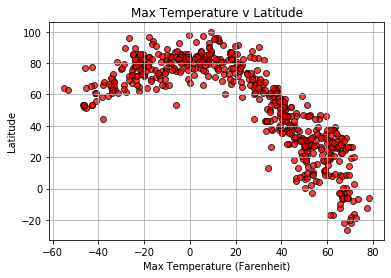

In [74]:
plt.scatter(lats, max_temps, marker="o", facecolors="red", edgecolors="black",
           alpha=0.75)
plt.grid()
plt.title("Max Temperature v Latitude")
plt.xlabel("Max Temperature (Farenheit)")
plt.ylabel("Latitude")
plt.savefig("output_data/fig1.png")
print("This scatter plot shows the relationship between the maximum temperature and latitude")

#### Latitude vs. Humidity Plot

This scatter plot shows the relationship between the latitude and humidity


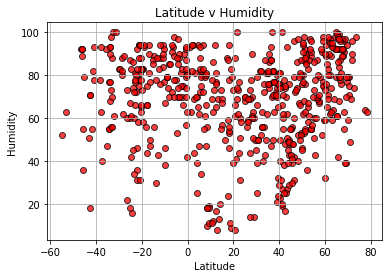

In [75]:
plt.scatter(lats,humidity, marker="o", facecolors="red", edgecolors="black",
           alpha=0.75)
plt.title("Latitude v Humidity")
plt.xlabel("Latitude")
plt.ylabel("Humidity")
plt.grid()
plt.savefig("output_data/fig2.png")
print("This scatter plot shows the relationship between the latitude and humidity")

#### Latitude vs. Cloudiness Plot

This scatter plot shows the relationship between the latitude and cloudliness


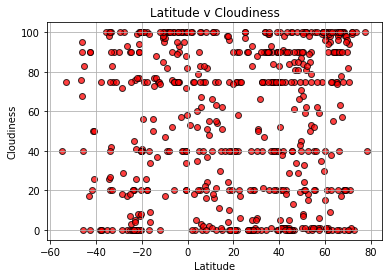

In [78]:
plt.scatter(lats, cloudiness, marker="o", facecolors="red", edgecolors="black",
           alpha=0.75)
plt.title("Latitude v Cloudiness")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness")
plt.grid()
plt.savefig("output_data/fig3.png")
print("This scatter plot shows the relationship between the latitude and cloudliness")

#### Latitude vs. Wind Speed Plot

This scatter plot shows the relationship between the latitude and wind speed


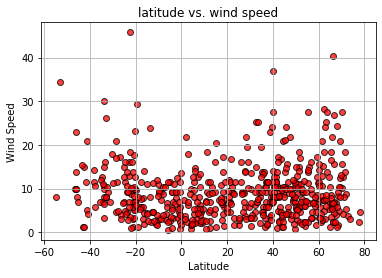

In [79]:
today = time.strftime("%m/%d/%Y")
plt.scatter(lats,wind_speed, marker="o", facecolors="red", edgecolors="black",
           alpha=0.75)
plt.title("latitude vs. wind speed")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed")
plt.grid()
plt.savefig("output_data/fig4.png")
print("This scatter plot shows the relationship between the latitude and wind speed")

## Linear Regression

In [42]:
# OPTIONAL: Create a function to create Linear Regression plots


In [43]:
# Create Northern and Southern Hemisphere DataFrames
northern_df = city_df.loc[pd.to_numeric(city_df["Latitude"]).astype(float) > 0, :]
southern_df = city_df.loc[pd.to_numeric(city_df["Latitude"]).astype(float) < 0, :]

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression